<a href="https://colab.research.google.com/github/Joon-hub/MLZoomcamp/blob/main/Week3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

## 3.1 Import the churn dataset

In [ ]:
!curl -O https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  954k  100  954k    0     0  2356k      0 --:--:-- --:--:-- --:--:-- 2362k


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop(['customerID'], axis =1 , inplace =True)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 3.2 Prepare the dataset

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

,0
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object
onlinebackup,object


In [ ]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.seniorcitizen = df.seniorcitizen.astype('str')
df.dtypes

,0
gender,object
seniorcitizen,object
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object
onlinebackup,object


In [ ]:
df.isna().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


In [ ]:
df.totalcharges = df.totalcharges.fillna(0)
df.isna().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


In [ ]:
categorical = (df.dtypes == 'object')
numerical = (df.dtypes != 'object')
print('categorical_columns', df.columns[categorical],'\n')
print('numerical_columns', df.columns[numerical])

categorical_columns Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object') 

numerical_columns Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')


In [ ]:
for col in df.columns[categorical]:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    print(df[col].unique())

['female' 'male']
['0' '1']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no_phone_service' 'no' 'yes']
['dsl' 'fiber_optic' 'no']
['no' 'yes' 'no_internet_service']
['yes' 'no' 'no_internet_service']
['no' 'yes' 'no_internet_service']
['no' 'yes' 'no_internet_service']
['no' 'yes' 'no_internet_service']
['no' 'yes' 'no_internet_service']
['month-to-month' 'one_year' 'two_year']
['yes' 'no']
['electronic_check' 'mailed_check' 'bank_transfer_(automatic)'
 'credit_card_(automatic)']
['no' 'yes']


In [ ]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [ ]:
df.churn.value_counts(normalize = True).reset_index()

,churn,proportion
0,no,0.73463
1,yes,0.26537


In [ ]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [ ]:
df.churn = df.churn.map({'yes':1, 'no':0}).astype('int')
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


## 3.3 Setting up validation framework

In [ ]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df_full_train,df_test = train_test_split(df, test_size=0.20, random_state=1)
df_train,df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
print(len(df_train), len(df_val), len(df_test))

4225 1409 1409


In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

## 3.4 EDA

In [ ]:
df.columns[categorical]

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')

In [ ]:
list(df.columns[categorical])

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [ ]:
categorical = df.columns[categorical].drop('churn').tolist()
numerical = df.columns[numerical].tolist()

In [ ]:
df_full_train[categorical].nunique()

,0
gender,2
seniorcitizen,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


## 3.5 Feature importance: churn rate and risk ratio

In [ ]:
df.churn.value_counts(normalize = True).reset_index()

,churn,proportion
0,0,0.73463
1,1,0.26537


In [ ]:
global_churn_rate = df.churn.value_counts(normalize = True).reset_index().iloc[1,1].round(2)
global_churn_rate

0.27

In [ ]:
df_full_train[df_full_train.gender == 'female'].churn.mean()

0.27682403433476394

In [ ]:
df_full_train.groupby('gender').churn.agg(['mean', 'count']).reset_index()

,gender,mean,count
0,female,0.276824,2796
1,male,0.263214,2838


In [ ]:
for col in df_full_train[categorical]:
  df_group = df_full_train.groupby(col).churn.agg(['mean'])
  df_group['diff'] = df_group['mean'] - global_churn_rate
  df_group['risk'] = df_group['mean'] / global_churn_rate
  display(df_group)


,mean,diff,risk
gender,,,
female,0.276824,0.006824,1.025274
male,0.263214,-0.006786,0.974865


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027730,0.897297
1,0.413377,0.143377,1.531027


,mean,diff,risk
partner,,,
no,0.329809,0.059809,1.221515
yes,0.205033,-0.064967,0.759383


,mean,diff,risk
dependents,,,
no,0.313760,0.043760,1.162074
yes,0.165666,-0.104334,0.613579


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028684,0.893764
yes,0.273049,0.003049,1.011292


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012593,0.953361
no_phone_service,0.241316,-0.028684,0.893764
yes,0.290742,0.020742,1.076820


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077653,0.712398
fiber_optic,0.425171,0.155171,1.574709
no,0.077805,-0.192195,0.288167


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150921,1.558967
no_internet_service,0.077805,-0.192195,0.288167
yes,0.153226,-0.116774,0.567503


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134323,1.497494
no_internet_service,0.077805,-0.192195,0.288167
yes,0.217232,-0.052768,0.804564


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125875,1.466205
no_internet_service,0.077805,-0.192195,0.288167
yes,0.230412,-0.039588,0.853379


,mean,diff,risk
techsupport,,,
no,0.418914,0.148914,1.551534
no_internet_service,0.077805,-0.192195,0.288167
yes,0.159926,-0.110074,0.592320


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072832,1.269747
no_internet_service,0.077805,-0.192195,0.288167
yes,0.302723,0.032723,1.121195


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068906,1.255209
no_internet_service,0.077805,-0.192195,0.288167
yes,0.307273,0.037273,1.138047


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161701,1.598893
one_year,0.120573,-0.149427,0.446568
two_year,0.028274,-0.241726,0.104718


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097929,0.637300
yes,0.338151,0.068151,1.252412


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101829,0.622854
credit_card_(automatic),0.164339,-0.105661,0.608661
electronic_check,0.455890,0.185890,1.688482
mailed_check,0.193870,-0.076130,0.718036


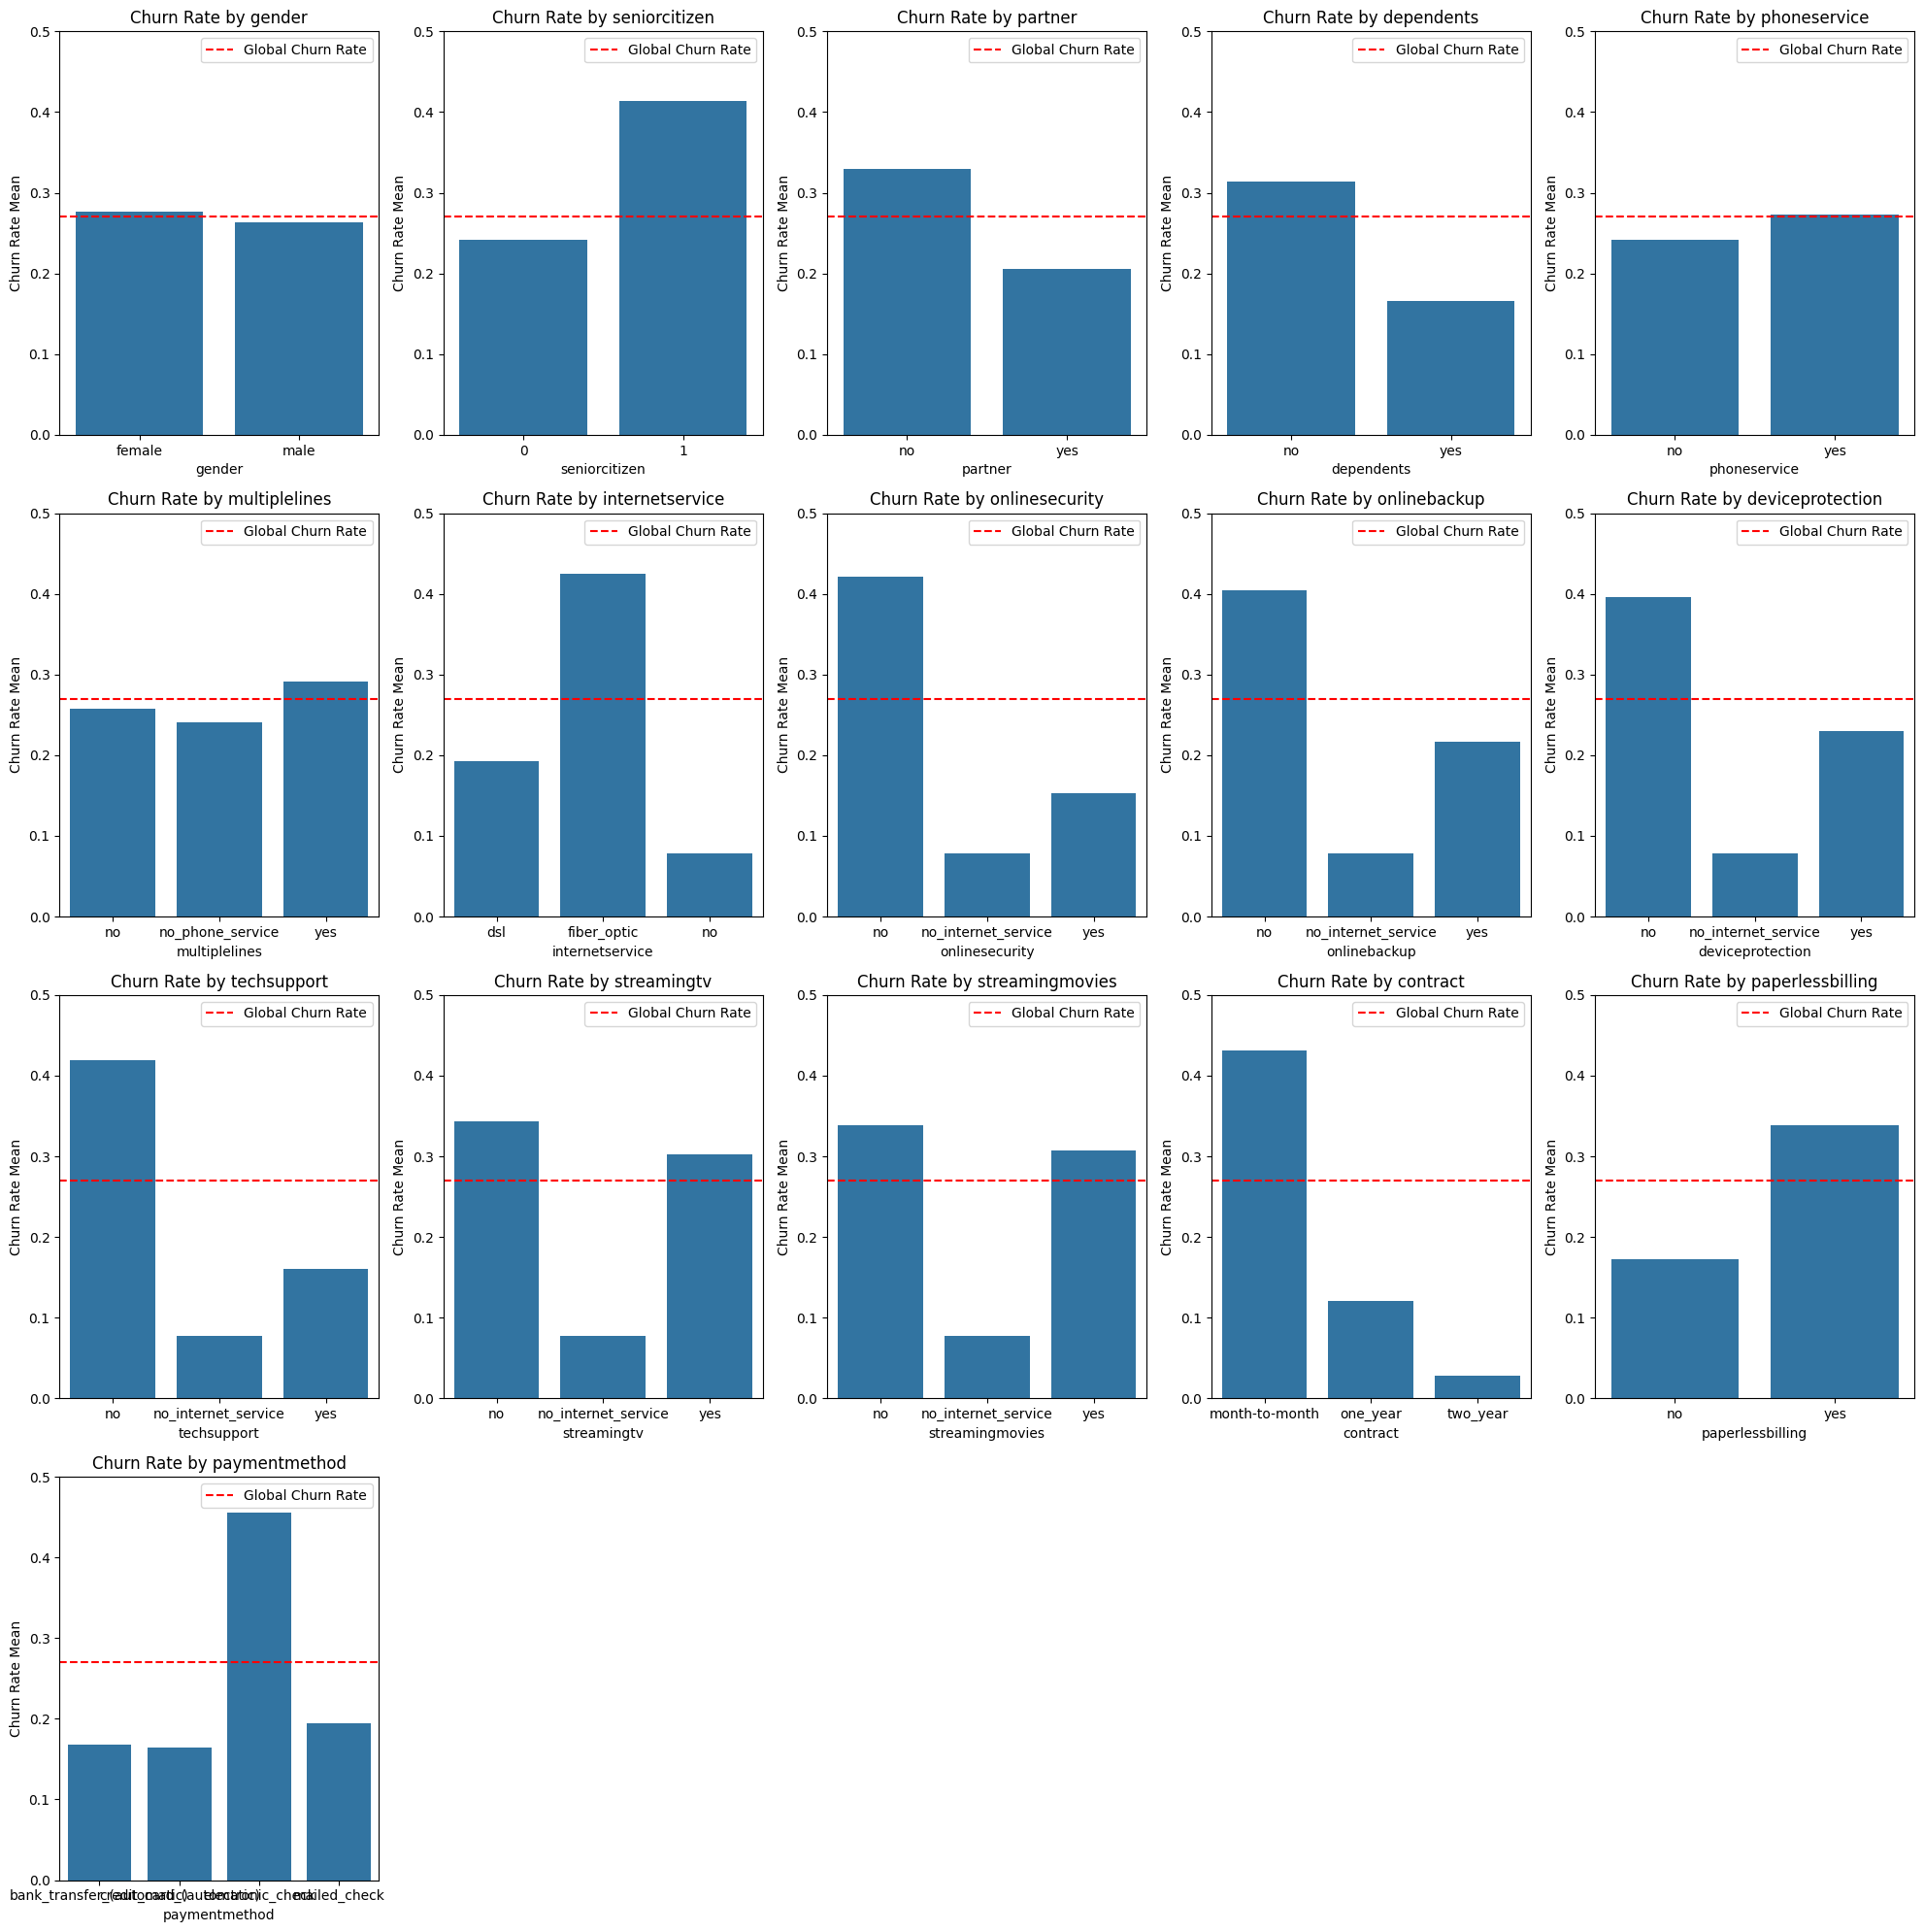

In [ ]:
# Define the number of columns for the grid layout
n_cols = 5
n_rows = math.ceil(len(categorical) / n_cols)  # Calculate the required number of rows

# Set the figure size, adjusting for the number of rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes for easy iteration, in case there are more subplots than categorical columns
axes = axes.flatten()

# Loop through the categorical columns and create barplots
for i, col in enumerate(df_full_train[categorical]):
    # Group by the categorical column and calculate churn statistics
    df_group = df_full_train.groupby(col).churn.agg(['mean'])

    # Calculate the difference and risk metrics
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate

    # Create a barplot for each categorical column in the corresponding subplot
    sns.barplot(ax=axes[i], data=df_group.reset_index(), x=col, y='mean')

    # Add a horizontal line for the global churn rate
    axes[i].axhline(global_churn_rate, color='red', linestyle='--', label='Global Churn Rate')

    # Set title and labels for clarity
    axes[i].set_title(f'Churn Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Churn Rate Mean')

    # Set y-axis limits
    axes[i].set_ylim(0.0, 0.5)

    # Add legend to indicate the global churn rate line
    axes[i].legend()

# Remove any unused subplots if there are more subplots than categorical columns
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout so plots don't overlap
plt.tight_layout()
plt.show()


## 3.6 Mutual information score

In [ ]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
  return mutual_info_score(series, df_full_train.churn)

for col in df.columns:
  ix = mutual_info_churn_score(df_full_train[col])
  print(col, ix.round(3))

gender 0.0
seniorcitizen 0.009
partner 0.01
dependents 0.012
tenure 0.082
phoneservice 0.0
multiplelines 0.001
internetservice 0.056
onlinesecurity 0.063
onlinebackup 0.047
deviceprotection 0.043
techsupport 0.061
streamingtv 0.032
streamingmovies 0.032
contract 0.098
paperlessbilling 0.018
paymentmethod 0.043
monthlycharges 0.197
totalcharges 0.548
churn 0.583


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


## 3.7 Feature importance of numerical variables

In [ ]:
df_full_train[numerical].corrwith(df.churn).abs().sort_values(ascending = False)


,0
tenure,0.351885
monthlycharges,0.196805
totalcharges,0.196353


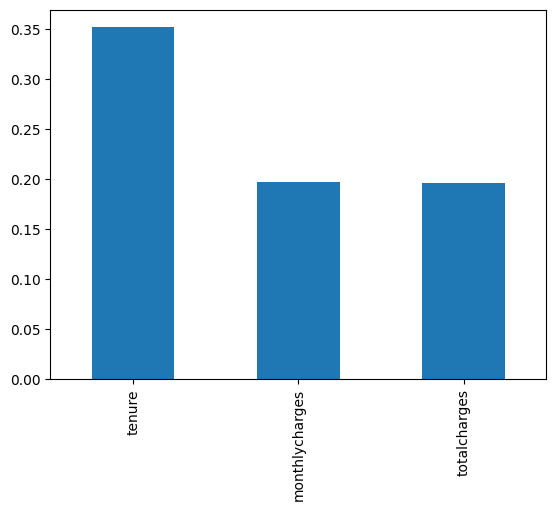

In [ ]:
df_full_train[numerical].corrwith(df.churn).abs().sort_values(ascending = False).plot(kind = 'bar');

In [ ]:
df_full_train.tenure.describe().T

,tenure
count,5634.000000
mean,32.277955
std,24.555211
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [ ]:
df_full_train[df_full_train.tenure <= 12].churn.mean().round(3)

0.476

In [ ]:
df_full_train[(df_full_train.tenure >= 12) & (df_full_train.tenure <= 24)].churn.mean().round(3)

0.305

In [ ]:
df_full_train[df_full_train.tenure >= 24].churn.mean().round(3)

0.146

## 3.8 OneHotEncoding

In [231]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
ohe = OneHotEncoder(sparse_output=False)
X_train_cat = ohe.fit_transform(df_train[categorical])
X_val_cat = ohe.fit_transform(df_val[categorical])
X_test_cat = ohe.fit_transform(df_test[categorical])

# Concatenate encoded categorical columns with numerical columns
X_train = np.hstack([X_train_cat, df_train[numerical].values])
X_val = np.hstack([X_val_cat, df_val[numerical].values])
X_test = np.hstack([X_test_cat, df_test[numerical].values])

ohe.get_feature_names_out()

array(['gender_female', 'gender_male', 'seniorcitizen_0',
       'seniorcitizen_1', 'partner_no', 'partner_yes', 'dependents_no',
       'dependents_yes', 'phoneservice_no', 'phoneservice_yes',
       'multiplelines_no', 'multiplelines_no_phone_service',
       'multiplelines_yes', 'internetservice_dsl',
       'internetservice_fiber_optic', 'internetservice_no',
       'onlinesecurity_no', 'onlinesecurity_no_internet_service',
       'onlinesecurity_yes', 'onlinebackup_no',
       'onlinebackup_no_internet_service', 'onlinebackup_yes',
       'deviceprotection_no', 'deviceprotection_no_internet_service',
       'deviceprotection_yes', 'techsupport_no',
       'techsupport_no_internet_service', 'techsupport_yes',
       'streamingtv_no', 'streamingtv_no_internet_service',
       'streamingtv_yes', 'streamingmovies_no',
       'streamingmovies_no_internet_service', 'streamingmovies_yes',
       'contract_month-to-month', 'contract_one_year',
       'contract_two_year', 'paperlessbilling

In [234]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4225, 46)
(1409, 46)
(1409, 46)


## 3.9 Logistic regression

## 3.10 Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [235]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [244]:
y_pred_val = model.predict(X_val)
y_pred = model.predict(X_test)

In [250]:
from sklearn.metrics import accuracy_score

# validation accuracy
print(f'validation accuracy: {round(accuracy_score(y_val, y_pred_val),3)}')
print(f'test accuracy: {round(accuracy_score(y_test, y_pred),3)}')

validation accuracy: 0.804
test accuracy: 0.81


In [255]:
X_test[0]

array([1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 4.10000e+01, 7.98500e+01,
       3.32075e+03])

## 3.11 Model interpretation

- Look at the cofficients
- Train a smaller model with fewer features

In [256]:
model.n_features_in_

46

In [264]:
model.intercept_.round(3)

array([-0.086])

In [263]:
model.coef_.round(3)

array([[-0.025, -0.061, -0.16 ,  0.075, -0.115,  0.03 , -0.001, -0.085,
         0.131, -0.217, -0.252,  0.131,  0.034, -0.309,  0.295, -0.072,
         0.271, -0.072, -0.285,  0.072, -0.072, -0.085,  0.075, -0.072,
        -0.089,  0.229, -0.072, -0.243, -0.055, -0.072,  0.041, -0.098,
        -0.072,  0.084,  0.439, -0.161, -0.364, -0.244,  0.158, -0.085,
        -0.035,  0.106, -0.071, -0.071,  0.004,  0.   ]])

In [280]:
model.predict_proba(X_test)[0][1]

0.04831839286159088

In [272]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [281]:
model.predict_proba(X_test)[-1][1]

0.5967861837312116

In [282]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

## 3.12 Regularized logistic regression

In [289]:
# L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# L2 regularization
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1.5)

# Fit the models
model_l1.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.5)

In [290]:
y_pred_val = model_l1.predict(X_val)
y_pred = model_l1.predict(X_test)

print(f'validation accuracy model: {round(accuracy_score(y_val, y_pred_val),3)}')
print(f'test accuracy modek: {round(accuracy_score(y_test, y_pred),3)}')

validation accuracy model: 0.806
test accuracy modek: 0.807


In [291]:
y_pred_val = model_l1.predict(X_val)
y_pred = model_l1.predict(X_test)

print(f'validation accuracy model_l1: {round(accuracy_score(y_val, y_pred_val),3)}')
print(f'test accuracy modek_l1: {round(accuracy_score(y_test, y_pred),3)}')

validation accuracy model_l1: 0.806
test accuracy modek_l1: 0.807


In [292]:
y_pred_val = model_l2.predict(X_val)
y_pred = model_l2.predict(X_test)

print(f'validation accuracy model_l2: {round(accuracy_score(y_val, y_pred_val),3)}')
print(f'test accuracy model_l2: {round(accuracy_score(y_test, y_pred),3)}')

validation accuracy model_l2: 0.803
test accuracy model_l2: 0.808
